## 模型可解釋性
- lime: 可以透過局部線性去找出模型表現的成因比例，用於各資料的分類器，文字、圖片、Tabular都可以。


In [2]:
import lime
import sklearn
import numpy as np
import sklearn.ensemble
import sklearn.metrics
from pprint import pprint

In [3]:
from sklearn.datasets import fetch_20newsgroups

# 取得資料並且把類別名稱記憶方便後續使用

categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

In [7]:
# 簡單觀察資料

pprint(newsgroups_train)

{'DESCR': '.. _20newsgroups_dataset:\n'
          '\n'
          'The 20 newsgroups text dataset\n'
          '------------------------------\n'
          '\n'
          'The 20 newsgroups dataset comprises around 18000 newsgroups posts '
          'on\n'
          '20 topics split in two subsets: one for training (or development)\n'
          'and the other one for testing (or for performance evaluation). The '
          'split\n'
          'between the train and test set is based upon a messages posted '
          'before\n'
          'and after a specific date.\n'
          '\n'
          'This module contains two loaders. The first one,\n'
          ':func:`sklearn.datasets.fetch_20newsgroups`,\n'
          'returns a list of the raw texts that can be fed to text feature\n'
          'extractors such as '
          ':class:`~sklearn.feature_extraction.text.CountVectorizer`\n'
          'with custom parameters so as to extract feature vectors.\n'
          'The second one, '
       

          'For this reason, the functions that load 20 Newsgroups data provide '
          'a\n'
          'parameter called **remove**, telling it what kinds of information '
          'to strip out\n'
          'of each file. **remove** should be a tuple containing any subset '
          'of\n'
          "``('headers', 'footers', 'quotes')``, telling it to remove headers, "
          'signature\n'
          'blocks, and quotation blocks respectively.\n'
          '\n'
          "  >>> newsgroups_test = fetch_20newsgroups(subset='test',\n"
          "  ...                                      remove=('headers', "
          "'footers', 'quotes'),\n"
          '  ...                                      categories=categories)\n'
          '  >>> vectors_test = vectorizer.transform(newsgroups_test.data)\n'
          '  >>> pred = clf.predict(vectors_test)\n'
          '  >>> metrics.f1_score(pred, newsgroups_test.target, '
          "average='macro')\n"
          '  0.77310...\n'
       

          ">and he listened then, in spite of their sins.  Why can't it be the "
          'same\n'
          '>way now?"\n'
          '\n'
          '\t"And in that day you will ask Me no question.  Truly, truly, I '
          'say to \n'
          '\tyou, if you shall ask the Father for anything, He will give it to '
          'you \n'
          '\tin my name.  Until now you have asked for nothing in My name; '
          'ask, and \n'
          '\tyou will receive, that your joy may be made full."\n'
          '\t\t\t\t-John 16:23-24\n'
          '\n'
          'I don\'t believe that we necessarily have to say " . . . In '
          "Christ's name.  \n"
          'Amen," for our prayers to be heard, but it glorifies the Son, when '
          'we \n'
          'acknowledge that our prayer is made possible by Him.  I believe '
          'that just as \n'
          'those who were saved in the OT, could only be saved because Jesus '
          'would one day\n'
          'reconcile God t

          '>Date: 18 Mar 93 07:31:55 GMT\n'
          '>I am looking for any information on the Branch Davidians.  Send '
          'info to Chad\n'
          '>Litton, ACS Dept. BGSU, Bowling Green OH  43403.  Or e-mail to\n'
          '>clitton@andy.bgsu.edu  Thanks in advance.\n'
          '\n'
          "I don't claim to be an expert on the branch Davidians, but I might "
          'know more \n'
          'than most.\n'
          '\n'
          'The Branch Davidian group (led by Koresh) is actually one of two '
          'off-shoots \n'
          "of a group known as the Shephard's Rod.  The Shephard's Rod (now \n"
          'defunct as far as I know)broke off from the SDA Church in the '
          "30's.\n"
          '\n'
          "The Shephard's Rod broke away from the SDA Church because they felt "
          'that the \n'
          'SDA Church was becoming weak and falling into apostacy.  They felt '
          'that they \n'
          'were the remnant spoken about in Revelati

          ' \n'
          ' \n'
          '>>It is also obvious that Mark has been edited. How old are the '
          'oldest\n'
          '>>manuscripts? To my knowledge (which can be antiquated) the oldest '
          'is\n'
          '>>quite after any of these estimates, and it is not even complete.\n'
          '>\n'
          '>The only clear "editing" is problem of the ending, and it\'s '
          'basically a\n'
          '>hopeless mess.  The oldest versions give a strong sense of '
          'incompleteness,\n'
          '>to the point where the shortest versions seem to break off in '
          'midsentence.\n'
          '>The most obvious solution is that at some point part of the text '
          'was lost.\n'
          '>The material from verse 9 on is pretty clearly later and seems to '
          'represent\n'
          '>a synopsys of the end of Luke.\n'
          '>\n'
          'In other words, one does not know what the original of Mark did '
          'look like\n

          'The analogy does not depend on the premisses being true, because '
          'the \n'
          'question under discussion is not truth but arrogance. \n'
          '\n'
          'A similar analogy might be a medical doctor who believes that a '
          'blood \n'
          'transfusion is necessary to save the life of a child whose parents '
          'are \n'
          "Jehovah's Witnesses and so have conscientious objections to blood \n"
          "transfusion. The doctor's efforts to persuade them to agree to a "
          'blood \n'
          'transfusion could be perceived to be arrogant in precisely the same '
          'way as \n'
          'Christians could be perceived to be arrogant.\n'
          '\n'
          'The truth or otherwise of the belief that a blood transfusion is '
          'necessary \n'
          'to save the life of the child is irrelevant here. What matters is '
          'that the \n'
          'doctor BELIEVES it to be true, and could be see

          'sway most people, for they simply do not accept the analogy.  Why?\n'
          '\n'
          'One of the big reasons is that many, many people want something\n'
          "beyond this life.  You can pretend that they don't want this, but I "
          'for\n'
          'one can accept it and even want it myself sometimes.\n'
          '\n'
          'And there is nothing unique in this example of why people want a '
          'God.\n'
          'Can love as a truth be proven, logically?\n'
          '\n'
          ">>themselves, namely, a god or gods.  So in principle it's hard to "
          'see how\n'
          '>>theists are necessarily arrogant.\n'
          '\n'
          '>Makes no sense to me.  They seem arrogant to make such a claim to '
          'me.\n'
          '>But my previous refutation still stands, and I believe there may '
          'be\n'
          '>another one on the net.\n'
          '\n'
          'John the Baptist boasted of Jesus to many people.  

          'the \n'
          'Spirit, and use them according to His leading.\n'
          '\n'
          'Link Hudson.\n',
          'From: jkellett@netcom.com (Joe Kellett)\n'
          'Subject: Re: Hell\n'
          'Organization: Netcom\n'
          'Lines: 17\n'
          '\n'
          'In article <Apr.10.05.33.44.1993.14422@athos.rutgers.edu> '
          'mcovingt@aisun3.ai.uga.edu (Michael Covington) writes:\n'
          '>\n'
          '>In a short poem ("God in His mercy made / the fixed pains of '
          'Hell"),\n'
          ">C. S. Lewis expresses an idea that I'm sure was current among "
          'others,\n'
          ">but I haven't be able to find its source:\n"
          '>\n'
          '>that even Hell is an expression of mercy, because God limits the '
          'amount\n'
          '>of separation from Him, and hence the amount of agony, that one '
          'can\n'
          '>achieve.\n'
          '>\n'
          '\n'
          'I have also heard it called an 

          'Organization: sgi\n'
          'Lines: 47\n'
          'Distribution: world\n'
          'NNTP-Posting-Host: solntze.wpd.sgi.com\n'
          '\n'
          'In article <1ql667INN54a@gap.caltech.edu>, keith@cco.caltech.edu '
          '(Keith Allan Schneider) writes:\n'
          '|> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n'
          '|> \n'
          "|> >I don't expect the lion to know, or not know anything of the "
          'kind.\n'
          "|> >In fact, I don't have any evidence that lions ever consider "
          'such \n'
          '|> >issues.\n'
          "|> >And that, of course, is why I don't think you can assign moral\n"
          '|> >significance to the instinctive behaviour of lions.\n'
          '|> \n'
          "|> What I've been saying is that moral behavior is likely the null "
          'behavior.\n'
          "|> That is, it doesn't take much work to be moral, but it certainly "
          'does to\n'
          '|> be immoral (in some ca

          '\n'
          'So what is it that must be added to disobedience to constitute a\n'
          'schism?  Maybe this something else makes the SSPX priests '
          'schismatics.\n'
          '\n'
          'You must add this: the rejection of the right to command.  Look in '
          'any\n'
          "decent reference on Catholic theology, and that's what you'll "
          'find:\n'
          'the distinguishing criterion of schism is rejection of the right '
          'to\n'
          'command.\n'
          '\n'
          "Here's what the Catholic Encyclopedia says, for example:\n"
          '\n'
          '    ... not every disobedience is a schism; in order to possess '
          'this\n'
          '    character it must include besides the trangression of the '
          'commands\n'
          '    of superiors, denial of their Divine right to command.\n'
          '    (from the CE article "Schism")\n'
          '\n'
          'Is the Society of Saint Pius X then sch

          'passing, but\n'
          'that this was expanded by Christian copyists.  Several '
          '"reconstructions" of\n'
          'the original text have been published to this effect.\n'
          '\n'
          'Much information appears in the Ecclesiastical History of Eusebius '
          '(about 320\n'
          'C.E.).  It is worthless as historical material because of the '
          'deliberate\n'
          'falsification of the wily Eusebius who is generally acknowledged as '
          "'the\n"
          "first thoroughly dishonest historian of antiquity.' It is Eusebius "
          'who is\n'
          'generally given the title of authorship for this material.\n'
          '\n'
          'Aside from the New Testament, the biographical information about '
          'Jesus is\n'
          'more well-documented.  For further information, please consult the '
          'Frequently\n'
          'Asked Questions file for the newsgroup soc.religion.christian.\n'
          

          '   intermarried with the Canaanites and been assimilated into\n'
          '   their culture.  Their oppression by the Egyptians a few\n'
          '   generations after their arrival in Egypt again looked like a\n'
          '   disaster. But God used it to bring them out of Egypt, and into\n'
          '   the Promised Land.\n'
          '        Here the people built a Temple, and regularly offered\n'
          '   sacrifices. But the Babylonians captured Jerusalem and Judea,\n'
          '   destroyed Temple and city and countryside, and deported most of\n'
          '   the people to Babylon. You might have thought that that would\n'
          '   be the end of the people and the religion. But it was not.\n'
          '   Living in Canaan, the people had been under constant danger of\n'
          '   assimilation.  Again and again, they had turned from the\n'
          '   worship of the LORD to the worship of the Canaanite fertility\n'
          '   cults, with their r

          'that he could not use other people, like the Apostles, in drawing '
          'up the\n'
          'canon.  The Apostles were most certain users of the Septuagint, as '
          'some\n'
          '80% of the Old Testament quotes use the wording of the Septuagint, '
          'and\n'
          'not the Hebrew.  And the Septuagint includes the Deuterocanon.\n',
          'From: jodfishe@silver.ucs.indiana.edu (joseph dale fisher)\n'
          'Subject: Re: Salvation by deeds\n'
          'Organization: Indiana University\n'
          'Lines: 3\n'
          '\n'
          'Another guess to your salvation riddle would be "saved".\n'
          '\n'
          'Joe Fisher\n',
          'From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)\n'
          'Subject: Re: islamic genocide\n'
          'Organization: Technical University Braunschweig, Germany\n'
          'Lines: 23\n'
          '\n'
          'In article <1qi83b$ec4@horus.ap.mchp.sni.de>\n'
          "frank@D012S658.uuc

          'Lines: 39\n'
          '\n'
          'In article <1993Apr15.180024.19308@wam.umd.edu>  \n'
          'west@next02cville.wam.umd.edu (Stilgar) writes:\n'
          '\n'
          '+Last night, while watching the 2a.m. rebroadcast of Jerry Springer '
          '(a\n'
          '+talk show) I heard this Jewel of a thought from a 12 year old '
          'racist. \n'
          '+The focus of this show was on these kids and their hatred for the '
          'Jewish\n'
          '+religion, and why.  \n'
          '\n'
          '[some stuff deleted]\n'
          '\n'
          '+Interesting (and scary) no?  They went on to say how the Jews '
          'had \n'
          '+killed their god, and how in the end of time that all the races '
          'would\n'
          '+go to their homelands (of course, they would remain in America, '
          'which\n'
          '+is New Jeruselem, as it says in Gen 2??? (what another kid said) '
          'but\n'
          '+the rest of the races

          'Organization: Society for Trying Really Hard\n'
          'Lines: 25\n'
          '\n'
          'In article <1993Apr2.223248.19014@Princeton.EDU> '
          'qpliu@princeton.edu writes:\n'
          '>In article <1993Apr2.115300.803@batman.bmd.trw.com> '
          'jbrown@batman.bmd.trw.com writes:\n'
          '>>But God created Lucifer with a perfect nature and gave him along '
          'with\n'
          '>>the other angels free moral will.\n'
          '>\n'
          ">>Now God could have prevented Lucifer's fall by taking away his "
          'ability\n'
          '>>to choose between moral alternatives (worship God or worship '
          'himself),\n'
          '>\n'
          ">So Lucifer's moral choices are determined by his will.\n"
          '>What determines what his will is?\n'
          '>-- \n'
          '>qpliu@princeton.edu           Standard opinion: Opinions are '
          'delta-correlated.\n'
          '\n'
          'Bobby-\n'
          '\n'
       

          '\n'
          '      We are told that Jesus was betrayed while in Jerusalem by\n'
          'one of his followers, Judas Iscariot.   Matthew writes,\n'
          '\n'
          '       [Mt 27.5-10]  And throwing down the pieces of silver\n'
          '       in the temple, [Judas] departed... But, the chief\n'
          '       priests, taking the silver, said, "It isn\'t lawful for\n'
          '       us to put it in the treasury, since it is blood\n'
          '       money."  So they... bought a potter\'s field with it to\n'
          '       bury strangers in... Then was fulfilled what was\n'
          '       spoken by the prophet Jeremiah,\n'
          '\n'
          '       "And they took the thirty pieces of silver, the price\n'
          '       of him on whom a price had been set by some of the\n'
          "       sons of Israel, and they gave them for the potter's\n"
          '       field, as the lord directed me."\n'
          '\n'
          'This prophecy is

          '\n'
          '       Now comes perhaps one of the most extraordinary and\n'
          'embarrassing passages in the New Testament.  It is found in all\n'
          'three of the synoptic gospel stories, and casts some of the most\n'
          'unfavourable doubt on the whole theory of Christianity.  Jesus\n'
          'mentions the destruction of the Jewish temples and buildings, and\n'
          'his disciples ask him about this, and about the end of the world\n'
          'which he has been warning about.\n'
          '\n'
          "       The disciples: Tell us, when will this [the temple's\n"
          '       destruction] be, and what will be the sign of your\n'
          '       coming, and of the close of the age?\n'
          '\n'
          '       Jesus: Take care that no one leads you astray, for\n'
          '       many will come in my name, saying, "I am the christ."  \n'
          '       ...you will hear of wars and rumours of wars... for\n'
          '     

          'I used to be (ack, barf) a Catholic, and was even '
          'confirmed...Shortly\n'
          'thereafter I decided it was a load of BS.  My mom, who really '
          'insisted\n'
          'that I continue to go to church, felt it was her duty (!) to bring '
          'me up\n'
          "as a believer!  That was one of the more presumptuous things I've "
          'heard\n'
          'in my life.  I suggested we go talk to the priest, and she agreed.  '
          'The\n'
          'priest was amazingly cool about it...He basically said that if I '
          "didn't\n"
          'believe it, there was no good in forcing it on me.  Actually, I '
          'guess he\n'
          "wasn't amazingly cool about it--His response is what you'd hope "
          'for\n'
          "(indeed, expect) from a human being.  I s'pose I just _didn't_ "
          'expect\n'
          'it...  \n'
          '\n'
          'I find it absurd that religion exists; Yet, I can also see its\n'
  

          'that not everyone who is associated with heretical positions was '
          'in\n'
          'fact heretical.  There are scholars who maintain that Nestorius '
          'was\n'
          'not Nestorian.  I have to confess that the first time I read some '
          'of\n'
          'the correspondence between Nestorius and his opponents, I thought '
          'he\n'
          'got the better of them.\n'
          '\n'
          'However, most scholars do believe that the work that eventually led '
          'to\n'
          'Chalcedon was an advance, and that Nestorius was at the very least\n'
          '"rash and dogmatic" (as the editor of "The Christological '
          'Controversy"\n'
          'refers to him) in rejecting all approaches other than his own.  As\n'
          'regular Usenet readers know, narrowness can be just as much an\n'
          'impediment as being wrong.  Furthermore, he did say some things '
          'that I\n'
          'think are problematic

          'good non ego-centric Buddhists they are supposed to be, then I '
          'might listen.\n'
          '\n'
          'My opinion, I speak not for my place of employment... But I '
          'should...\n'
          '"Christ was over-rated, and will the ATF follow Koresh (the current '
          'Christ) through\n'
          'his ascention to heaven?"\n',
          'From: phs431d@vaxc.cc.monash.edu.au\n'
          'Subject: Re: The arrogance of Christians\n'
          'Organization: Monash University - Melbourne. Australia.\n'
          'Lines: 42\n'
          '\n'
          'In article <Apr.13.00.08.07.1993.28379@athos.rutgers.edu>, '
          'aa888@freenet.carleton.ca (Mark Baker) writes:\n'
          '>  \n'
          '> [Very good and reasonable statements on "authority" deleted]\n'
          '> \n'
          '> The atheist position seems to be that there are no authorities. '
          'This is a\n'
          '> reasonable assertion in itself, but it leads to a practic

          '     The following are some of the main purposes this group will\n'
          '     achieve:\n'
          '\n'
          '     i)   To discuss the common beliefs of all major religions as\n'
          '          they relate to Ahmadiyya Muslim Community.\n'
          '\n'
          '     ii)  To discuss the doctrines, origin and teachings  of this\n'
          '          puissant spiritual force on earth.\n'
          '\n'
          '     iii) To examine Islamic teachings and beliefs in general  in\n'
          '          light  of the Quran  and established Islamic traditions\n'
          '          of 15 centuries from Ahmadiyya perspective.\n'
          '\n'
          '     iv)  To discuss the similarities  between Ahmadi Muslims and\n'
          '          people of other Religions  of the world and discuss how\n'
          "          religious tolerance  and respect to other's  faiths can\n"
          '          be brought about to  eliminate inter-religion rivalries\n'

          'devour.\n'
          '>No capital, no industry, very poor social services - the '
          'education\n'
          '>level in Muslim countries are the lowest in the world, the health\n'
          '>statistics are miserable etc.. \n'
          '\n'
          'One can postulate numerous reasons for this.  Your theory is that '
          'it is\n'
          'because Islam is not secularist and capitalist, etc. etc.\n'
          '\n'
          'Selim, I will give you a clear historical example to show you the\n'
          'fallacy of your views if you think (as you obviously do) that\n'
          'Islam => lack of education and power.\n'
          '\n'
          'For a large part of history, the Islamic world was very powerful.  '
          'For a\n'
          'significant section of history, the Islamic world was the foremost '
          'in\n'
          'the sciences.  So to say that Islam is, for example, anti-education '
          'is\n'
          'completely absurd.  You t

          'word\n'
          '> if it had to be interpreted.\n'
          '\n'
          'In college, I took an entire course in Biblical interpretation.  Go '
          'to\n'
          'any Christian bookstore, there are scores of books on interpreting '
          'and\n'
          'understanding Scripture.  If interpretation is unnecessary, there '
          'are \n'
          'an awful lot of misguided Christians out there wasting a lot of '
          'time \n'
          'and energy on it.\n'
          '\n'
          'Carol Alvin\n'
          'caralv@auto-trol.com\n',
          'From: stovall@ficus.cs.ucla.edu (Steven Stovall)\n'
          'Subject: Re: Rebuilding the Temple (was Re: Anybody out there?)\n'
          'Organization: UCLA, Computer Science Department\n'
          'Lines: 25\n'
          '\n'
          'tcsteven@iaserv.b1.ingr.com (Todd Stevens) writes:\n'
          '\n'
          '>Chuck Petch writes:\n'
          '\n'
          '>>Now it appears that nothing stands i

          '>> it is no argument for doing away with the death penalty.  If we '
          'went\n'
          '>> to war and worried about accidentally killing civilians all of '
          'the time\n'
          '>> (because our determination of who the enemy really is is '
          'imperfect), then\n'
          '>> there is no way to win the war.\n'
          '> \n'
          '> Yes.  Fortunately we have right-thinking folks like your good '
          'self in power,\n'
          '> and it was therefore deemed acceptable to slaughter tens or even '
          'hundreds of\n'
          '> thousands of Iraqis in order to liberate oil^H^H^HKuwait.  We won '
          'the war,\n'
          '> hurrah hurrah!\n'
          '\n'
          'The number of civilian Iraqi deaths were way over-exaggerated and \n'
          'exploited for anti-war emotionalism by the liberal news media.  '
          'The\n'
          'facts are that less Iraqis died in the Gulf War than did '
          'civilians 

          'Organization: Boston University Physics Department\n'
          'Lines: 117\n'
          '\n'
          'In article <16BB112949.I3150101@dbstu1.rz.tu-bs.de> '
          'I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau) writes:\n'
          '>In article <115287@bu.edu> jaeger@buphy.bu.edu (Gregg Jaeger) '
          'writes:\n'
          '\n'
          ' \n'
          '>>>>>A brutal system filtered through "leniency" is not lenient.\n'
          '\n'
          '\n'
          '>>>>Huh?\n'
          '\n'
          '\n'
          '>>>How do you rate public floggings or floggings at all? Chopping '
          'off the\n'
          '>>>hands, heads, or other body  parts? What about stoning?\n'
          '\n'
          '\n'
          ">>I don't have a problem with floggings, particularly, when the "
          'offenders\n'
          '>>have been given a chance to change their behavior before '
          'floggings are\n'
          '>>given. I do have a problem with maiming in general, 

          '       "Satan and the Angels do not have freewill.  \n'
          '        They do what god tells them to do. "\n'
          '\n'
          '        S.N. Mozumder (snm6394@ultb.isc.rit.edu) \n',
          'From: lpzsml@unicorn.nott.ac.uk (Steve Lang)\n'
          "Subject: Re: Objective Values 'v' Scientific Accuracy (was Re: "
          'After 2000 years, can we say that Christian Morality is)\n'
          'Organization: Nottingham University\n'
          'Lines: 38\n'
          '\n'
          'In article <C5J718.Jzv@dcs.ed.ac.uk>, tk@dcs.ed.ac.uk (Tommy Kelly) '
          'wrote:\n'
          '> In article <1qjahh$mrs@horus.ap.mchp.sni.de> frank@D012S658.uucp '
          "(Frank O'Dwyer) writes:\n"
          '> \n'
          '> >Science ("the real world") has its basis in values, not the '
          'other way round, \n'
          '> >as you would wish it.  \n'
          '> \n'
          "> You must be using 'values' to mean something different from the "
          'way I\

          '\n'
          ' "The meek can *have* the Earth. The rest of us are going to the\n'
          'stars!" - Robert A. Heinlein\n',
          'From: pharvey@quack.kfu.com (Paul Harvey)\n'
          'Subject: Re: Sabbath Admissions 5of5\n'
          'Organization: The Duck Pond public unix: +1 408 249 9630, log in as '
          "'guest'.\n"
          'Lines: 194\n'
          '\n'
          '\n'
          '\n'
          'In article <Apr.19.05.12.10.1993.29131@athos.rutgers.edu> \n'
          'pharvey@quack.kfu.com (Paul Harvey) writes:\n'
          '\n'
          '>priority than the direct word of Jesus in Matt5:14-19? Paul '
          'begins\n'
          '>Romans 14 with "If someone is weak in the faith ..." Do you count\n'
          '>yourself as one who is weak in the faith?\n'
          '\n'
          'Do you count yourself as one who is weak in the faith?\n'
          '\n'
          ">you read Jesus' word in Matt5:14-19? Is there any doubt in your "
          'mind\n'
      

          'NNTP-Posting-Host: punisher.caltech.edu\n'
          '\n'
          'livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n'
          '\n'
          ">>So, you are saying that it isn't possible for an instinctive act\n"
          '>>to be moral one?\n'
          '>I like to think that many things are possible.   Explain to me\n'
          '>how instinctive acts can be moral acts, and I am happy to listen.\n'
          '\n'
          'For example, if it were instinctive not to murder...\n'
          '\n'
          '>>That is, in order for an act to be an act of morality,\n'
          '>>the person must consider the immoral action but then disregard \n'
          '>>it?\n'
          '>Weaker than that.   There must be the possibility that the\n'
          ">organism - it's not just people we are talking about - can\n"
          '>consider alternatives.\n'
          '\n'
          'So, only intelligent beings can be moral, even if the bahavior of '
          'other\n'
          '

          'mine.\n'
          '\n'
          "I suppose the point of all this is that people shouldn't assume "
          'that all \n'
          'believers of Jewish background are the same.  For some `Jewish \n'
          "Christian' is a good name, for others it is an oxymoron. \n"
          '\n'
          'Jayne Kulikauskas/jayen@mmalt.guild.org\n',
          'From: noye@midway.uchicago.edu (vera shanti noyes)\n'
          'Subject: Re: Satan kicked out of heaven: Biblical?\n'
          'Reply-To: noye@midway.uchicago.edu\n'
          'Organization: University of Chicago\n'
          'Lines: 42\n'
          '\n'
          'In article <May.7.01.09.04.1993.14501@athos.rutgers.edu> '
          'easteee@wkuvx1.bitnet writes:\n'
          '>Hello all,\n'
          '>     I have a question about Satan.  I was taught a long time ago\n'
          '>that Satan was really an angel of God and was kicked out of '
          'heaven\n'
          ">because he challenged God's authority.  The prob

          '"nothing", science has some good candidates for an answer.\n'
          '\n'
          'I have always wondered why Christians use the "There are questions\n'
          'science (or atheism) cannot answer" argument; I hope this is the\n'
          'appropriate group to ask this question.\n'
          '\n'
          'The most popular question is the question of origins. Why does the\n'
          'universe exist, or anything, for that matter?\n'
          '\n'
          'I think this question should actually be split into two parts, '
          'namely\n'
          '\n'
          '1) Why is there existence? Why anything exists?\n'
          '\n'
          'and\n'
          '\n'
          '2) How did the universe emerge from nothing?\n'
          '\n'
          'It is clear science has nothing to say about the first question. '
          'However,\n'
          'is it a meaningful question, after all?\n'
          '\n'
          "I would say it isn't. Consider the following:\n"
 

          'social caste, nor are they driven to organize and spread their '
          'beliefs.\n'
          'The overuse of Nazism and Stalinism just show how true this is:  '
          'Two groups\n'
          'with very clear and specific ideologies using religious persecution '
          'to\n'
          'further their means.  Anyone who cannot see the obvious - namely '
          'that these\n'
          'were groups founded for reasons *entirely* their own, who used '
          'religious\n'
          'persecution not because of any belief system but because it made '
          'them more\n'
          'powerfull - is trying too hard.  Basically, Bobby uses these '
          'examples\n'
          'because there are so few wars that were *not* *specifically* fought '
          'over\n'
          'religion that he does not have many choices.\n'
          '\n'
          "Well, I'm off to Key West where the only flames are heating the "
          'bottom of\n'
          'little silve

          'most\n'
          'people do very successfully.  I suppose one could hold compromise '
          'as\n'
          'being an absolute moral, but then what happens when someone else\n'
          'insists on no compromise?  How do you compromise on compromising?\n'
          '\n'
          '>#Given a choice between a peaceful compromise or endless '
          'contention,\n'
          '>#I\'d say that compromise seems to be "better".\n'
          '>\n'
          ">And I would agree.   But it's bloody to pointless to speak of it "
          "if it's\n"
          '>merely a matter of taste.  Is your liking for peace any better '
          'founded\n'
          ">than someone else's liking for ice-cream?  I'm looking for a way "
          'to say\n'
          '>"yes" to that question, and relativism isn\'t it.\n'
          '\n'
          'Almost invariably when considering the relative value of one thing\n'
          'over another, be it morals or consequences, people only conside

          'supernatural have a valid basis for accepting the existence of '
          'uncaused \n'
          'phenomena such as the eternal God, whereas those who deny the '
          'existence of the \n'
          'supernatural are faced with the dilemma of a physical universe '
          'whose very \n'
          'nature shows that it is not sufficient to explain its own '
          'existence.\n'
          '\n'
          'This is, of course, an oversimplification of a complex topic, but I '
          'just wanted \n'
          'to clarify some important differences between the supernatural '
          '(God) and the \n'
          'natural (the universe), since you seem to mistake them as being \n'
          'interchangeable.\n'
          '\n'
          '- Mark\n',
          'From: trajan@cwis.unomaha.edu (Stephen McIntyre)\n'
          'Subject: Re: Atheists and Hell\n'
          'Organization: University of Nebraska at Omaha\n'
          'Lines: 52\n'
          '\n'
          'at

          'responsibilities.  This idea of praying "in Jesus\' name" is not '
          'only\n'
          "present but prominent in the Lord's Prayer, although the verbal\n"
          'forumula is absent.\n'
          '\n'
          'The act of praying the words "In Jesus\' Name" may be beneficial '
          'if\n'
          'they cause us to clarify the relationship of our requests to the\n'
          "advancement of God's Kingdom.  For that reason, I'm not quite "
          'ready\n'
          'to say that the praying the formula is without meaning.\n'
          '\n'
          'Prayers to God for other purposes (desperation, anger, '
          'thanksgiving,\n'
          "etc.) don't seem to be in this category at all, whether uttered by\n"
          "Christian or non-Christian, whether B.C. or A.D. (that's B.C.E. or\n"
          "C.E. for you P.C. :-).  I don't see anything in Christ's words to\n"
          'contradict the idea that God deals with all prayers according to '
      

          'From: tas@pegasus.com (Len Howard)\n'
          'Subject: Re: Question from an agnostic\n'
          'Organization: Pegasus,  Honolulu\n'
          'Lines: 18\n'
          '\n'
          'Hi Damon,  No matter what system or explanation of creation you '
          'wish\n'
          'to accept, you always have to start with one of two premises, '
          'creation\n'
          'from nothing, or creation from something.  There are no other\n'
          'alternatives.  And if we accept one or the other of those two\n'
          'premises, then again there are two alternatives, either creation '
          'was\n'
          'random, or was according to some plan.\n'
          '   If it was random, I am unable to accept that the complex nature '
          'of\n'
          'our world with interrelated interdependent organisms and creatures\n'
          'could exist as they do.  Therefore I am left with creation under '
          'the\n'
          'control of an intelligence capab

          '\n'
          'In article <2944079995.1.p00261@psilink.com> "Robert Knowles" '
          '<p00261@psilink.com> writes:\n'
          ">Writing the Seven Seals or something along those lines.  He's "
          'already\n'
          '>written the first of the Seven which was around 30 pages or so and '
          'has\n'
          '>handed it over to an assistant for PROOFREADING!.  I would expect '
          'any\n'
          '>decent messiah to have a built-in spellchecker.  Maybe Koresh 2.0 '
          'will\n'
          '>come with one.\n'
          '\n'
          'I heard he had asked the FBI to provide him with a word processor.  '
          'Does\n'
          'anyone know if Koresh has requested that it be WordPerfect5.0?  '
          'WP5.0 was\n'
          'written (and is owned) by Mormons, so the theological implications '
          'of\n'
          'requesting (or refusing) WP5.0 are profound!\n'
          '\n'
          'darin\n'
          'wilkins@scubed.scubed.com

          '|> this on the assumption that if everyone in the world were '
          'deprived utterly\n'
          '|> of their freedom (so that their every act was contrary to their '
          'volition),\n'
          '|> almost all would want to complain.  Therefore I take it that to '
          'assert or\n'
          '|> believe that "Freedom is not very valuable", when almost '
          'everyone can see\n'
          '|> that it is, is every bit as absurd as to assert "it is not '
          'raining" on\n'
          '|> a rainy day.  I take this to be a candidate for an objective '
          'value, and it\n'
          '|> it is a necessary condition for objective morality that '
          'objective values\n'
          '|> such as this exist.\n'
          '\n'
          'My own personal and highly subjective opinion is that freedom\n'
          'is a good thing.\n'
          '\n'
          'However, when I here people assert that the only "true" freedom\n'
          'is in foll

          "     Bath, Ohio.  It's right outside of Akron, in the northeast "
          'part of Ohio.\n'
          '\n'
          '>8.  While under the age of 16 did you ever commit a criminal\n'
          '>offence?\n'
          '     No, and none of my kids would dream of it.  I hope you can use '
          'this to\n'
          "teach all parents that physical punishment isn't always required - "
          'parents use\n'
          'that as an excuse to hit too hard.\n'
          '\n'
          '>9.  How ere you disciplined as a kid\n'
          "     Lots of timeouts, same as I use.  Our family and my husband's "
          'have never\n'
          'used spankings.  In fact, my grandmother in law was one of 11 kids, '
          'and they\n'
          'were almost never spanked.  This was around the turn of the '
          'century.  And,\n'
          "none of us has ever been afoul of the law - man-made or God's law.\n"
          '     Jesus says, referring to a small child whom he 

          '>What I was asking is this:\n'
          '>\n'
          '>Please show me that the most effective substance-absure recovery\n'
          ">programs involve meetinsg peoples' spiritual needs, rather than\n"
          ">merely attempting to fill peoples' spiritual needs as percieved\n"
          '>by the people, A.A, S.R.C. regulars, or snoopy. \n'
          '\n'
          'You are asking me to provide objective proof for the existence of\n'
          'God.  I never claimed to be able to do this; in fact I do not '
          'believe\n'
          'that it is possible to do so.  I consider the existence of God to\n'
          'be a premise or assumption that underlies my philosophy of life.\n'
          "It comes down to a matter of faith.   If I weren't a Christian, I\n"
          'would be an agnostic, but I have sufficient subjective evidence to\n'
          'justify and sustain my relationship with God.  Again this is a '
          'matter\n'
          'of premises and assu

          'baptism\n'
          'with the baptism of John or other Jewish baptism.  Of course '
          "there's a\n"
          'certain parallelism between these passages.  That suggests that we\n'
          "could just as well say that Mat 28:18 doesn't require the specific\n"
          'three-fold formula to be used in baptism, but simply characterizes\n'
          'baptism done by those who follow the Father, Son, and Holy Spirit.\n'
          '\n'
          'One might well suspect that in the early church, more than one\n'
          'baptismal formula was used.  So long as we consider following Jesus '
          'to\n'
          'be the same as following the Father, Son, and Holy Spirit, no '
          'great\n'
          'damage would be done by such a difference.  This does *not* mean '
          'that\n'
          'I think we should go back to using both formulae.  Baptism is one '
          'of\n'
          'the few things that almost all Christian groups now recognize\n'
  

          'channeled\n'
          'it to a plea to all of us to refrain from passing judgement on '
          'those\n'
          'afflicted with a disease and to reach out to others.  Give in?  '
          'Calling\n'
          'his arguments foolish, belittling them to only quarrels, avoiding '
          'action\n'
          "because of fear to give others a bad feeling, he's not forgiving?\n"
          '\n'
          "Re-think it, Aaron.  Don't be quick to judge.  He has forgiven "
          'those with\n'
          'AIDS, he has dealt with and taken responsibility for his feelings '
          'and made\n'
          'appropriate choices for action on such feelings.  He has not given '
          'in to\n'
          'his anger.\n'
          '\n'
          'Joe Moore\n',
          'From: datepper@phoenix.Princeton.EDU (David Aaron Tepper)\n'
          'Subject: Re: After 2000 years, can we say that Christian Morality '
          'is\n'
          'Originator: news@nimaster\n'
          

          'Organization: MIT Lincoln Laboratory\n'
          'Lines: 17\n'
          '\n'
          'In article <Apr.10.05.32.36.1993.14391@athos.rutgers.edu>  \n'
          'gsu0033@uxa.ecn.bgu.edu (Eric Molas) writes:\n'
          '\n'
          '> We are _just_ animals.  We need sleep, food, and we reproduce.  '
          'And \n'
          '> we die.\n'
          '\n'
          'I agree we need sleep & etc, but I disagree we are _just_ '
          'animals.   \n'
          "That statement is a categorical negative; it's like saying there "
          'are  \n'
          '_no_ polkadoted elephants.  It may be true but one would have to '
          'be  \n'
          'omniscient to know for sure.\n'
          '\n'
          '------------------------------------------------------------\n'
          'Rob Steele                 In coming to understand anything \n'
          'MIT Lincoln Laboratory    we are rejecting the facts as they\n'
          '244 Wood St., M-203       are for us in

          'Male Chauvinist Pig. The statement that woman is not capable of\n'
          'functioning by herself, that she needs a man to open doors for '
          'her,\n'
          'would have been seen as a particularly gratuitous insult. The fact\n'
          'that the creation of woman from the dust of the ground was given\n'
          'only briefly and in general, while the creation of the Man was '
          'given\n'
          'in six times the number of words, would have been cited as '
          'evidence\n'
          "of the author's estimate of the relative importance of the sexes.\n"
          'The verdict would have been unequivocal. "No self-respecting woman\n'
          'can accept this book as a moral guide, or as anything but sexist\n'
          'trash!" I suggest that Moses, fearing this reaction, altered his\n'
          'original draft and described the creation with Adam first and then\n'
          'Eve, so as to appease Miriam and other radical feminists of the '

          'will be\n'
          'charismatic.\n'
          '\n'
          'Ken Banner\n'
          'Dept. of Religious Studies\n'
          'University of Pennsylvania\n'
          'kbanner@philae.sas.upenn.edu \n',
          'From: timmbake@mcl.ucsb.edu (Bake Timmons)\n'
          'Subject: Re: Amusing atheists and agnostics\n'
          'Lines: 76\n'
          '\n'
          '\n'
          'Chris Faehl writes:\n'
          '\n'
          '> >Many atheists do not mock the concept of a god, they are shocked '
          'that\n'
          '> >so many theists have fallen to such a low level that they '
          'actually\n'
          '> >believe in a god.  You accuse all atheists of being part of a '
          'conspiracy,\n'
          '> >again without evidence.\n'
          '>\n'
          '>> Rule *2:  Condescending to the population at large (i.e., '
          'theists) will >not\n'
          '>> win many people to your faith anytime soon.  It only ruins your '
          'credibilit

          'In article <May.3.05.01.53.1993.9964@athos.rutgers.edu> '
          'a.faris@trl.oz.au (Aziz Faris) writes:\n'
          '\n'
          '>[I think you\'re talking about the "assumption of the Blessed '
          'Virgin\n'
          '>Mary".  It says that "The Immaculate Mother of God, the ever '
          'Virgin\n'
          '>Mary, having completed the course of her earthly life, was '
          'assumed\n'
          '>body and soul into heavenly glory."  This was defined by a Papal\n'
          '>statement in 1950, though it had certainly been believed by some\n'
          '>before that.  --clh]\n'
          '\n'
          "So true.  I'm not sure of the basis of the belief, but it was a "
          'widely\n'
          'held belief among the laity of the RC church and their support of '
          'it\n'
          'lead to it being declared to be true.  Basically the teaching on '
          'infallibility\n'
          'holds that the pope is infallible in matters of faith

          '>>Judaism, for one. Maddi has confirmed this for one. And again I\n'
          '>>reiterate that one can easily leave the religion at any time,\n'
          '>>simply by making a public declaration. If one is too lazy to do\n'
          '>>that then the religion cannot be held responsible.\n'
          '\n'
          '>There are many "Islamic" countries where publically renouncing '
          'Islam can be\n'
          '>quite dangerous.  These countries might not, according to you, '
          'necessarily be\n'
          '>practicing "true" Islam, but the danger still remains; one cannot '
          'blame\n'
          '>failure to publically renounce Islam on "laziness" as opposed to a '
          'desire to\n'
          '>stay alive and well.\n'
          '\n'
          "Of course, if you're planning to pull a Rushdie then declaring "
          "one's\n"
          'leaving the religion is little to be concerned about compared to '
          "one's\n"
          'other pla

          '\n'
          '>>>I hope you understand now.\n'
          '\n'
          '>>Yes, Jim.  I do understand now.  Thank you for providing some '
          'healthy sarcasm\n'
          '>>that would have dispelled any sympathies I would have had for '
          'your faith.\n'
          '\n'
          '>Bake,\n'
          '\n'
          ">Real glad you detected the sarcasm angle, but am really bummin' "
          'that\n'
          ">I won't be getting any of your sympathy.  Still, if your inclined\n"
          ">to have sympathy for somebody's *faith*, you might try one of the\n"
          '>religion newsgroups.\n'
          '\n'
          ">Just be careful over there, though. (make believe I'm\n"
          ">whispering in your ear here)  They're all delusional!\n"
          '\n'
          'Jim,\n'
          '\n'
          "Sorry I can't pity you, Jim.  And I'm sorry that you have these "
          'feelings of\n'
          'denial about the faith you need to get by.  Oh well, j

          'For example:\n'
          '"If we legalize marijuana, then we would have to legalize crack and '
          'heroin\n'
          "and we'll have a nation full of drug-addicts on welfare.  Therefore "
          'we cannot\n'
          'legalize marijuana."\n'
          '\n'
          '"A IS BASED ON B" FALLACIES / "IS A TYPE OF" FALLACIES\n'
          '\n'
          'These fallacies occur when one attempts to argue that things are in '
          'some way\n'
          'similar without actually specifying in what way they are similar.\n'
          '\n'
          'Examples:\n'
          '"Isn\'t history based upon faith?  If so, then isn\'t the Bible '
          'also a form of\n'
          'history?"\n'
          '\n'
          '"Islam is based on faith, Christianity is based on faith, so isn\'t '
          'Islam a\n'
          'form of Christianity?"\n'
          '\n'
          '"Cats are a form of animal based on carbon chemistry, dogs are a '
          'form of\n'
         

          'NNTP-Posting-Host: lloyd.caltech.edu\n'
          '\n'
          'bobbe@vice.ICO.TEK.COM (Robert Beauchaine) writes:\n'
          '\n'
          '>To show that the examples I and others\n'
          '>have provided are *not* counter examples of your supposed '
          'inherent\n'
          '>moral hypothesis, you have to successfully argue that\n'
          '>domestication removes or alters this morality.\n'
          '\n'
          'I think that domestication will change behavior to a large degree.\n'
          'Domesticated animals exhibit behaviors not found in the wild.  I\n'
          "don't think that they can be viewed as good representatives of the\n"
          'wild animal kingdom, since they have been bred for thousands of '
          'years\n'
          'to produce certain behaviors, etc.\n'
          '\n'
          'keith\n',
          'From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)\n'
          'Subject: Re: Wholly Babble (Was Re: free moral agency)\n'


          '\n'
          '\n'
          '\n'
          'An Irish Fairwell\n'
          '\n'
          'may the road rise to meet you\n'
          'may the wind be always at your back\n'
          'may the sun shine warm upon your face, \n'
          'the rains fall soft upon your fields,\n'
          'and until we meet again,\n'
          'may God hold you in the palm of his hand.\n'
          '\n'
          '\n'
          '--\n'
          '/----------------------------------------------------------------|-------\\\n'
          '|  Simon P. Shields Programmer           Viva Cristo Rey !!  '
          '----|----   |\n'
          '|  MONASH UNIVERSITY COLLEGE GIPPSLAND Ph:+61 51 226 357       '
          '.JHS.     |\n'
          '|  Switchback Rd. Churchill.          Fax:+61 51 226 300       '
          '|\\|/|     |\n'
          '|  Australia 3842      Internet: simon@giaec.cc.monash.edu.au  |M '
          'J|     |\n'
          '\\------------------------------------------------------

          '\n'
          '\n'
          '--\n'
          'Ed McCreary                                               ,__o\n'
          'edm@twisto.compaq.com                                   _-\\_<, \n'
          '"If it were not for laughter, there would be no Tao."  (*)/\'(*)\n',
          'From: sciysg@nusunix1.nus.sg (Yung Shing Gene)\n'
          'Subject: Mission Aviation Fellowship\n'
          'Organization: National University of Singapore\n'
          'Lines: 3\n'
          '\n'
          'Hi,\n'
          '\tDoes anyone know anything about this group and what they\n'
          'do? Any info would be appreciated. Thanks!\n',
          'From: Bjorn.B.Larsen@delab.sintef.no (Bjorn B. Larsen)\n'
          'Subject: Re: The Bible available in every language (was Re: SATANIC '
          'TOUNGES)\n'
          'Reply-To: bjorn.b.larsen@delab.sintef.no\n'
          'Organization: delab\n'
          'Lines: 31\n'
          '\n'
          'In article <May.5.02.53.10.1993.28880@athos.r

          'gifts of faith to me is that of seeking and accepting forgiveness '
          'for\n'
          "my failures. Expecting flawless behavior from self or others isn't\n"
          "Christianity: it's perfectionism.\n"
          ' \n',
          'From: erh0362@tesla.njit.edu\n'
          'Subject: Mormon beliefs about bastards\n'
          'Organization: New Jersey Institute of Technology\n'
          'Lines: 14\n'
          '\n'
          '\n'
          '    Could anyone enlighten me on how the Mormon church views \n'
          "children born out of wedlock?  In particular I'm interested to know "
          'if any \n'
          "stigma is attached to the children as opposed to the parents.  I'm "
          'especially \n'
          'keen to learn if there is or is not any prohibition in the Mormon '
          'faith on \n'
          'bastards entering heaven or having their names entered in the big '
          'genealogical \n'
          'book the Mormons keep in Salt Lake Cit

          'of\n'
          'the secular authorities to eject the priest from the church.  The\n'
          'priests would just start building new churches; the people were\n'
          'completely behind them.  The old parishes had the New Mass, as the\n'
          'bishop desired -- and virtually no parishioners.\n'
          '\n'
          'The prime motivation for all this was completely illegal, according '
          'to\n'
          'canon law.  No priest can be penalized in any way for saying the\n'
          'traditional Mass, because of legislation enacted by Pope Saint Pius '
          'V.\n'
          'Nor is there any obligation to say the New Mass.\n'
          '\n'
          'During all this process, the people of Campos, not just private\n'
          'individuals, but including civil authorities, were constantly '
          'sending\n'
          'petitions and letters to Rome to do something about the new '
          'Modernist\n'
          'bishop.  NOTHING was ever done

          'Christ is  \n'
          'our master and he was not delivered by his servants because his '
          'kingdom  \n'
          'was not of this world, then his servants cannot possibly fight for '
          'another  \n'
          'master.\n'
          '\n'
          'Strangers and pilgrims have no rights, and we cannot swear '
          'allegiance to  \n'
          'anyone but God.\n'
          '\n'
          'The servant of the Lord must not war but be gentle to all (2 Tim '
          '2:24) -  \n'
          'this does not just apply to war, but also to avoiding strife '
          'throughout  \n'
          "our lives. There is a war to be waged, not with man's weapons (2 "
          'Cor  \n'
          "10:3-4), but with God's armour (Eph6:13-20).\n"
          '\n'
          "I'll probably post some more when I've had time to look into things "
          'a bit  \n'
          'further.\n'
          '\n'
          '--\n'
          'Gideon King                         | Pho

          'In article <Apr.9.01.11.00.1993.16923@athos.rutgers.edu> '
          'topcat!tom@tredysvr.tredydev.unisys.com (Tom Albrecht) writes:\n'
          '\n'
          '>Now, as to the suggestion that all prophecy tends to be somewhat '
          'cyclical,\n'
          ">can you elaborate?  I'm not exactly sure what you mean.  How does "
          'the\n'
          ">suggestion relate to Isaiah's prophecy of the birth of Christ by a "
          'virgin? \n'
          ">I don't see any cycles in that prophecy.\n"
          '\n'
          'Maybe cyclical is not the best word.  That is one aspect of it.  In '
          'the\n'
          'case of the virgin birth prophecy, it applied to the then and '
          'there, and\n'
          'also prophetically to Christ.  The army that threatened the king '
          'would \n'
          'cease to be a threat in a very short time.  Yet it also prophecied '
          'of \n'
          'Christ.\n'
          '\n'
          'Several prophecies

          'words\n'
          'that are spoken need to be compared against the rule/canon but not\n'
          'added to the canon.\n'
          '\n'
          'Is new revelation necessary?  Topical, current, personal '
          'revelation\n'
          "I'd say is necessary.  New revelation for all people for all times\n"
          'is not necessary as we have that in Scripture.\n'
          '\n'
          'You also seem to confuse canon with scripture.  Scripture may speak '
          'of\n'
          'itself being open - ie God speaking today.  It would speak that it '
          'is\n'
          'closed in the sense that the canon is unchangeable.  (Though the '
          'concept\n'
          'of canon is later historically.)\n'
          '\n'
          '>Also interesting to note is that some so called prophecies are '
          'nothing new\n'
          '>but rather an inspired translation of scripture.  Is it right to '
          'call\n'
          ">that prophecy?  Misleading? 

          'prophet.\n'
          '\n'
          ">I'll pose a question here that's got me thinking:  what "
          'distinguishes\n'
          '>"true" religion from cults (I\'m speaking generally here, not '
          'specifially\n'
          '>about Christianity)?  Jerry Falwell was on Good Morning America '
          'on \n'
          '>Tuesday ostensibly to answer this question.  Basically, he said '
          'that\n'
          '>true religion follows a message whereas a cult follows a person.\n'
          '>But, then, Christianity is a cult because the message of '
          'Christianity\n'
          '>IS the person of Jesus.  So what distinguishes, for example, the\n'
          '>Branch Davidian "cult" from the Presbyterian "church"?  Doctrinal\n'
          ">differences don't answer the question, IMHO, so don't use them as\n"
          '>an answer.\n'
          '\n'
          '\n'
          'As far as I can see, one of the big differences between Davidians '
          'and

          'desire to be like\n'
          'Christ that often causes christians to be very critical of '
          'themselves and other\n'
          'christians. We are supposed to grow, mature, endeavour to be '
          'Christ-like but we\n'
          "are far far far from perfect. Build up the body of Christ, don't "
          'tear it down,\n'
          'and that includes yourself. Jesus loves me just the way I am today, '
          'tomorrow and\n'
          'always (thank God ! :-).\n'
          '\n'
          '-Sheila Patterson\n',
          'From: David.Bernard@central.sun.com (Dave Bernard)\n'
          'Subject: Re: Question about Virgin Mary\n'
          'Reply-To: David.Bernard@central.sun.com\n'
          'Organization: Sun Microsystems\n'
          'Lines: 9\n'
          '\n'
          'In article 28782@athos.rutgers.edu, revdak@netcom.com (D. Andrew '
          'Kille) writes:\n'
          '>Just an observation- although the bodily assumption has no basis '
          '

          '\n'
          'Is anyone familiar with Doug Sturm?\n'
          '\n'
          'If so, please post what you think.\n',
          'From: khan0095@nova.gmi.edu (Mohammad Razi Khan)\n'
          'Subject: Re: Bible Unsuitable for New Christians\n'
          'Organization: GMI Engineering&Management Institute, Flint, MI\n'
          'Lines: 19\n'
          '\n'
          'news@cbnewsk.att.com writes:\n'
          '\n'
          '>True.\n'
          '\n'
          '>Also read 2 Peter 3:16\n'
          '\n'
          '>Peter warns that the scriptures are often hard to understand by '
          'those who\n'
          '>are not learned on the subject.\n'
          '\n'
          'Where do insparations/Miracles fit in?  I was a new reader to the '
          'bible\n'
          "and Qu'ran at the same time in my life and I can tell you that I "
          'would \n'
          'have drifted in my faith if Those books were not exposed to me.\n'
          '\n'
          '\n'
          '\

          'Hi there netters,\n'
          'I have a question I would very much like to see some discussion '
          'on:\n'
          "Is there such a thing as a 'justifible' war? \n"
          '\n'
          'What I would love to see it some basis from scripture for either: '
          '"All war  \n'
          'is wrong", or "Some war is justifiable". \n'
          '\n'
          'To get things started I would like to outline why I am asking '
          'the  \n'
          'question. In my high school days I had been quite involved in the '
          'the New  \n'
          'Zealand Cadet Forces (This is a bit like ROTC from what I '
          'understand of  \n'
          'it, but with a lot more emphasis on fun than military career '
          'training).  \n'
          'Through this I became extremely enamoured of flying, have become '
          'involved  \n'
          'in the sport of gliding, and have a great interest in military '
          'aviation  \n'
          "hardware

          'Many\n'
          'atheists (myself included) take the following position:\n'
          '\n'
          '(5) I do not believe that there is a god.\n'
          '(6) I do not believe that there is not a god.\n'
          '\n'
          'That is , I harbor no beliefs at all, there is no good evidence\n'
          'for god existing or not.  Some folks call this agnosticism.  It '
          'does not\n'
          'suffer from "blind faith" at all.  I think of it as "Don\'t worry, '
          'be happy".\n',
          'From: sieferme@stein.u.washington.edu (Eric Sieferman)\n'
          "Subject: Re: I don't beleive in you either.\n"
          'Organization: University of Washington, Seattle\n'
          'Lines: 15\n'
          'NNTP-Posting-Host: stein.u.washington.edu\n'
          '\n'
          'In article <1993Apr13.213055.818@antioc.antioch.edu> '
          'smauldin@antioc.antioch.edu writes:\n'
          '>I stopped believing in you as well, long before the invention of '
  

          "I'd be surprised to see the moderator let this one through, but I "
          'seriously\n'
          'want a reasonable explanation for this.\n'
          '\n'
          'ken\n',
          'From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\n'
          'Subject: Re: Hell_2:  Black Sabbath\n'
          'Organization: Motorola LPA Development\n'
          'Lines: 38\n'
          '\n'
          'In article <Apr.23.02.54.12.1993.3063@geneva.rutgers.edu>,\n'
          'salaris@niblick.ecn.purdue.edu (Rrrrrrrrrrrrrrrabbits) wrote:\n'
          '\n'
          '> Jeff Fenholt claims to have once been a roadie for Black '
          'Sabbath.\n'
          '> He was never ever a musician in the band.  He was in St. Louis '
          'several\n'
          '> months back.  The poster I saw at the Christian bookstore I '
          'frequent\n'
          '> really turned me off.  It was addressed to all "Homosexuals, '
          'prostitutes,\n'
          '> drug addicts, alcoholics, and head

          '> \n'
          '>      The way of the wicked is an abomination unto the LORD:  but '
          'he\n'
          '>      loveth him that followeth after righteousness.   Proverbs '
          '15:9\n'
          '> \n'
          '>      For  the LORD knoweth the way of the righteous: but the way '
          'of\n'
          '>      the ungodly shall perish.                            Psalm '
          '1:6\n'
          ' \n'
          '  \n'
          "I am extremely uncomfortable with this way of phrasing it.  God's "
          'love \n'
          'is unconditional, unqualified, unfathomable.  We are capable of \n'
          "rejecting God's love but He never fails to love us.\n"
          '\n'
          "These verses do not show that God's love is qualified but rather "
          'that He \n'
          'is opposed to evil.\n'
          '\n'
          'I am uncomfortable with the tract in general because there seems to '
          'be \n'
          'an innappropriate emphasis

          'O, new Mother of Eden, Most Pure\n'
          'Preparing the sanctuary for true christians\n'
          "Cleansing us with peace for God's kingdom come\n"
          'Bring us to your loving, protective and obedient Church\n'
          'That we may belong in one Body to your Son, Jesus Christ, our Lord\n'
          'And not go astray from His perfect completeness\n'
          'Pray that we ourselves pray with the Holy Spirit guiding us\n'
          'So that we may help you in strength to conquer the enemies of your '
          'Son\n'
          '  while you prepare us for Him with your Immaculate Heart.\n',
          'From: king@ctron.com (John E. King)\n'
          'Subject: Re: Eternity of Hell (was Re: Hell)\n'
          'Organization: Cabletron Systems Inc.\n'
          'Lines: 8\n'
          '\n'
          'db7n+@andrew.cmu.edu (D. Andrew Byler) writes:\n'
          '\n'
          '>And we also know that it is impossible to destroy the Soul.\n'
          '\n'
          '

          'Subject: Re: Gospel Dating\n'
          'Organization: Case Western Reserve University\n'
          'Lines: 26\n'
          'NNTP-Posting-Host: b64635.student.cwru.edu\n'
          '\n'
          'In article <1993Apr6.021635.20958@wam.umd.edu> '
          'west@next02cville.wam.umd.edu (Stilgar) writes:\n'
          '\n'
          '>Fine... THE ILLIAD IS THE WORD OF GOD(tm)  (disputed or not, it '
          'is)\n'
          '>\n'
          ">Dispute that.  It won't matter.  Prove me wrong.\n"
          '\n'
          '\tThe Illiad contains more than one word. Ergo: it can not be\n'
          'the Word of God. \n'
          '\n'
          '\tBut, if you will humbly agree that it is the WORDS of God, I \n'
          'will conceed.\n'
          '\n'
          '\t:-D\n'
          '\n'
          '\n'
          '---\n'
          '\n'
          '        "One thing that relates is among Navy men that get tatoos '
          'that \n'
          '        say "Mom", because of the love

          '|> \n'
          '|> One thing that relates is among Navy men that get tatoos that '
          'say "Mom",\n'
          '|> because of the love of their mom.  It makes for more virile '
          'men.\n'
          '|> Compare that with how homos are raised.  Do a study and you will '
          'get my\n'
          '|> point.\n'
          '|> \n'
          '|> But in no way do you have a claim that it would be better if the '
          'men\n'
          '|> stayed home and raised the child.  That is something false made '
          'up by\n'
          '|> feminists that seek a status above men.  You do not recognize '
          'the fact\n'
          '|> that men and women have natural differences.  Not just '
          'physically, but\n'
          '|> mentally also.\n'
          '|> \n'
          '\n'
          "Bobby, there's a question here that I just HAVE to ask. If all\n"
          "of your posts aren't some sort of extended, elaborate hoax, why\n"
          'are you 

          'be\n'
          '>judged on whether we lived good lives, striving to achieve that\n'
          '>goodness that is within the power of each of us.  Now, the\n'
          '>complication is that one of my best friends has become very\n'
          '>fundamentalist.  That would normally be a non-issue with me, but '
          'he\n'
          '>feels it is his responsibility to proselytize me (which I guess it '
          'is,\n'
          '>according to his faith).  This is a great strain to our '
          'friendship...\n'
          '\n'
          "Sorry to disappoint you, but I'm afraid your friendship is in "
          'danger.  \n'
          'Perhaps you should examine in yourself why as such a good friend, '
          'you \n'
          'are unwilling to accept this imortant part of your friends life?  '
          'Why \n'
          'do you call into question his faith?  Your friend has changed, he '
          'has \n'
          'found something that fills a need in his li

          'God is a\n'
          'God of holiness and must judge sin, the fact that He has made us '
          'the kind of\n'
          "creatures we are and therefore we're responsible, the fact that He "
          'has placed\n'
          'us in a "uni"verse that has purpose and design behind it, the fact '
          'that sin is\n'
          'such an awful thing and the fact that God Himself went through hell '
          'to save us\n'
          'from hell leads us to two applications.\n'
          '\n'
          "1)  As I've already mentioned.  If you are a Christian, you must "
          'worn others. \n'
          'Its not good enough to stop and fix their flat tire and not tell '
          'them that just\n'
          'around the bend the bridge is out.  "Knowing therefore the terror '
          'of Lord, we\n'
          'persuade men."\n'
          '\n'
          "2)  If you haven't accepted Jesus are your Savior, you're taking an "
          'awful\n'
          'chance.  As I

          '\n'
          'I think Christianity goes down in flames if the resurrection is\n'
          'ever disproved. I also think that this will not happen, as\n'
          'the evidence for the resurrection is quite good as these things\n'
          'go. It is not entirely fair to claim that you can only take\n'
          'the resurrection on faith. There are reasons to believe it\n'
          'that appeal to the mind, too.\n',
          'From: Eugene.Bigelow@ebay.sun.com (Geno )\n'
          'Subject: Re: Christianity and repeated lives\n'
          'Reply-To: Eugene.Bigelow@ebay.sun.com\n'
          'Organization: Sun Microsystems, Inc.\n'
          'Lines: 13\n'
          '\n'
          '\n'
          ' > ...there is nothing in Christianity that precludes the idea of\n'
          ' > repeated lives on earth.\n'
          '\n'
          'There is a paragraph in the New Testament which in my opinion, '
          'clearly makes\n'
          "a positive inference to reincarnation. I

          'I answer in the affirmative.  Now this answer might sound a little\n'
          'intellectually dishonest to Bob, but I think I have been accused '
          'before\n'
          'of that heinous crime and am man enough to take it.  !-)  What '
          'thinking\n'
          'person has not at one time or other been accused of it?   Is it\n'
          'politically correct for Christians to be the only besieged group\n'
          'permitted the luxury of arrogance?   \n'
          '\n'
          'Now I have a question for Bob.  Why in the world would any '
          'self-respecting\n'
          'atheist want to subscribe to a Christian news group?  I have a \n'
          'difficult enough time keeping up with it, and I think I know '
          'something\n'
          'about the subject.     \n'
          '\n'
          'Bob reminds me of my roommate.  In order to disbelieve atheism, he '
          'says \n'
          "he will need to be proven wrong about it.  Well, I don'

          '\n'
          ': Are the governments of the United States and Europe not moving\n'
          ': to end the ethnic cleansing by the Serbs because the targets are\n'
          ': muslims?\n'
          '\n'
          ': Can/Does God use those who are not following him to accomplish\n'
          ': tasks for him?  Esp those tasks that are punative?\n'
          '\n'
          ': James Sledd\n'
          ": no cute sig....  but I'm working on it.\n"
          '\n'
          'Are you suggesting that God supports genocide?\n'
          'Perhaps the Germans were "punishing" Jews on God\'s behalf?\n'
          '\n'
          'Any God who works that way is indescribably evil, and unworthy of\n'
          'my worship or faith.\n'
          '\n'
          'revdak@netcom.com\n',
          'From: gt7122b@prism.gatech.edu (boundary)\n'
          'Subject: Re: DID HE REALLY RISE???\n'
          'Organization: Georgia Institute of Technology\n'
          'Lines: 50\n'
          '\n'
        

          'persecution\n'
          '>>>and I share it even more than you (being muslim), however '
          "Rushdie's\n"
          '>>>behavior was not completely excusable.\n'
          '\n'
          'As much as I considered some of the (so-called) Islam-related '
          'dialogue\n'
          "here a total waste of time, I somehow can't restrain myself in "
          'this\n'
          'instance, so, Gregg, try this:\n'
          '\n'
          '20:52 P.S.T.  I come to my senses and accept the all-knowing\n'
          'wisdom and power of the Quran and Allah.  Not only that, but '
          'Allah \n'
          'himself drops by to congratulate me on my wise choice. Allah rolls '
          'a\n'
          'few bones and we get down.  Then Allah gets out the Crisco, bends \n'
          'over, and invites me to take a spin around the block.  Wow.\n'
          '\n'
          '20:56 P.S.T.  I realize that maybe Allah is looking for more of a \n'
          'commitment than I\'m rea

          ' \n'
          ' \n'
          'Q. But  I am not wicked.  I am a decent, moral person.  Surely the '
          'good\n'
          '   I have done in my life far outweighs whatever bad I have done.   '
          'How\n'
          '   can these verses apply to me?\n'
          ' \n'
          "A. By  God's  standard  of  righteousness even the most moral "
          'person is\n'
          '   looked upon by God as a desperate sinner on his way to  Hell.    '
          'The\n'
          '   Bible teaches that no one is good enough in himself to go to '
          'Heaven.\n'
          '   On  the  contrary,  we  are all sinners and we are all guilty '
          'before\n'
          '   God.\n'
          ' \n'
          '      As it is written, There is none righteous, no, not one:  '
          'There\n'
          '      is  none  that understandeth, there is none that seeketh '
          'after\n'
          '      God.                                            Romans '
       

          '$800;\n'
          'now it is less than half that.  This prediction stuck in my mind\n'
          'because a lot of people where I worked were buying gold.\n'
          '\n'
          'The problem is, we tend to remember predictions that come true and\n'
          "forget ones that didn't (a la Jean Dixon).  Does anyone know if "
          'there\n'
          'any of his predictions, perhaps from the book I mentioned, that '
          'can\n'
          'pretty definitely be said to have not come true?\n'
          '--\n'
          '-Fred Gilham    gilham@csl.sri.com\n'
          '"Peace is only better than war when it\'s not hell too.  War being '
          'hell\n'
          'makes sense."\n'
          '               -Walker Percy, THE SECOND COMING\n',
          'From: luomat@alleg.edu (Timothy J. Luoma)\n'
          'Subject: Re: DID HE REALLY RISE???\n'
          'Reply-To: luomat@alleg.edu\n'
          'Organization: Allegheny College\n'
          'Lines: 53\n'
       

          'livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n'
          '> In article <1993Apr3.033446.10669@bmerh85.bnr.ca>, '
          'dgraham@bmers30.bnr.ca (Douglas Graham) writes:\n'
          '> |> In article <1pint5$1l4@fido.asd.sgi.com> '
          'livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n'
          '> |> >\n'
          '> |> Deletions...\n'
          '> |> Er, Jon, what Ken said was:\n'
          '> |> \n'
          '> |>   There have previously been people like you in your country.  '
          'Unfortunately,\n'
          '> |>                              ^^^^^^^^^^^^^^^\n'
          '> |>   most Jews did not survive.\n'
          '> |> \n'
          '> |> That sure sounds to me like Ken is accusing the guy of being a '
          'Nazi.\n'
          '> \n'
          "> Hitler and the Nazis didn't spring fully formed from the "
          'forehead\n'
          "> of Athena.   They didn't invent anti-semitism.   They built on "
          'a \n'
          '> fo

          'achieve.\n'
          '\n'
          '-- \n'
          ':-  Michael A. Covington         internet mcovingt@ai.uga.edu :    '
          '*****\n'
          ':-  Artificial Intelligence Programs       phone 706 542-0358 :  '
          '*********\n'
          ':-  The University of Georgia                fax 706 542-0349 :   '
          '*  *  *\n'
          ':-  Athens, Georgia 30602-7415 U.S.A.     amateur radio N4TMI :  ** '
          '*** **  <><\n',
          'From: KEMPJA@rcwusr.bp.com\n'
          'Subject: Re: Religious wars\n'
          'Organization: BP Research, Cleveland, OH (USA)\n'
          'Lines: 30\n'
          '\n'
          '\n'
          'In article <Apr.21.03.24.44.1993.1288@geneva.rutgers.edu>, '
          'fraseraj@dcs.glasgow.ac.uk (Andrew J Fraser) writes:\n'
          '> "Well you know that religion has caused more wars than\n'
          '> anything else"\n'
          '> It bothers me that I cannot seem to find a satisfactory\n'
          '> response 

          '               to the Gentiles to mock, and to scourge, and\n'
          '               to crucify Him; and the third day He shall\n'
          '               rise again" (Matthew 20:18-19).\n'
          '\n'
          '          Wholly different from the normal experience of men, '
          'Jesus,\n'
          '     who had *never* done anything worthy of death, even deserving\n'
          '     reproval, knew He would die before He was 40 years of age.  '
          'He\n'
          '     knew the very city where He would die.  He knew that the '
          'religious\n'
          '     leaders of His own race would condemn Him to death.  He knew '
          'that\n'
          '     one of His own would betray Him.  He knew that before His '
          'actual\n'
          '     death took place He would be mocked and scourged.  He knew '
          'exactly\n'
          '     how He would die--*by crucifixion.*\n'
          '\n'
          '          All this is in itself 

          '#>necessary.\n'
          '#\n'
          '#Why would it be necessary?  What right do we have to interfere?\n'
          '\n'
          "IMO, it isn't often that interference (i.e. jail, and force of "
          'various\n'
          'kinds and degrees) is both necessary and effective.  Where you '
          'derive \n'
          "the right to interfere is a difficult question - it's a sort of\n"
          'liar\'s paradox: "force is necessary for freedom".   One possible '
          'justification\n'
          "is that people who wish to take away freedom shouldn't object if\n"
          "their own freedom is taken away - the paradox doesn't arise if\n"
          "we don't actively wish to take way anyone's freedom.\n"
          '#\n'
          '#  The introduction of permissible interference causes the problem\n'
          '#>that it can be either too much or too little - but most people '
          'seem\n'
          '#>to agree that some level of interference is necessar

          'Subject: Catholic Liturgy\n'
          'Reply-To: halsall@murray.fordham.edu\n'
          'Organization: J. Random Misconfigured Site\n'
          'Lines: 60\n'
          '\n'
          '\n'
          '\tThe problems with Catholic liturgy are likely to continue for\n'
          'some time.  The problem is, in a nutshell, this: the Liturgy is a\n'
          'symbolic action - in other words Catholics do [or should] believe '
          'that\n'
          'the _signs_ during the mass - Water, Blessings, Vestments, Altar,\n'
          'Relics, etc - are real. That is the sprinkling of water bestows '
          'real,\n'
          'almost tangible, holiness, the Vestments are a real indication of '
          'real\n'
          'sacred time. The point of a _symbol_ is that it is understood by '
          'all\n'
          'to be connected to an underlying REAL referent. This kind of '
          'thinking\n'
          'precludes analysis; holy water is not holy because of anything,

          '\n'
          'I thought this was just another novel book, but I saw it listed as\n'
          'a text for a class in religious studies here.  Also, the '
          'endorsements seem\n'
          "to come from some credible sources, so I'm wondering if scholars "
          'have\n'
          'reviewed it (or anyone on the net, for that matter).\n'
          '\n'
          '-- \n'
          'Rob Butera        |\n'
          'ECE Grad Student  |     "Only sick music makes money today" \n'
          'Rice University   |\n'
          'Houston, TX 77054 |               - Nietzsche, 1888\n',
          'From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)\n'
          "Subject: Re: A visit from the Jehovah's Witnesses\n"
          'Organization: Technical University Braunschweig, Germany\n'
          'Lines: 114\n'
          '\n'
          'In article <1993Apr5.091139.823@batman.bmd.trw.com>\n'
          'jbrown@batman.bmd.trw.com writes:\n'
          ' \n'
          ">> Didn't yo

          '  vonWrights\'s comment that Witt\'s "sentences have a content that '
          'often lies\n'
          'deep beneath the surface of language."  On the surface, Witt talks '
          'of the\n'
          'insuperable position of ordinary language and the necessity of '
          'bringing\n'
          'ourselves to accept it without question.  At the same time, we are '
          'faced with\n'
          "Witt's own creative uses of language and his concern for bringing "
          'about changes\n'
          'in our traditional modes of understanding.  Philosophy, then, '
          'through more\n'
          'perspicacious speech, seeks to effect this unity rather than '
          'assuming that it\n'
          'is already functioning. Yes?  The most brilliant of scientists are '
          'unable to\n'
          'offer a foundation for human speech so long as they reject '
          'Christianity! In his\n'
          'Tractatus we have the well nigh perfect exhibition of

          'the gospel and their social contexts.  (If anything, Brown is '
          '*too*\n'
          'heroic here -- he manages to overstrain himself at times :-))\n'
          '\n'
          "I don't suggest that we *follow* any of these old cult paths -- "
          'and\n'
          'it raises hard questions from the skeptic inside me that so much '
          'of\n'
          'early Christianity *was* like the weird (Christian and '
          'non-Christian)\n'
          'cults we see today.  To that extent, I think you raise a serious\n'
          'problem (and perhaps your phrasing is implicitly self-deprecatory\n'
          'and ironic.)\n'
          '\n'
          'But the first principle for *answering* these questions is respect '
          'and\n'
          'love for those we do not understand.  And it helps to *work* at '
          'under-\n'
          'standing (as long as we do not get overwhelmed by revulsion and '
          'begin\n'
          'to withdraw our respec

          '\n'
          'If someone else has beliefs that are different from mine, so what.\n'
          'Neither of us are necessarily wrong.  Someone else is making sense '
          'out\n'
          'of a different set of experiences.  Even though we have different\n'
          'explanations and beliefs, if we talk we might even discover that '
          'the\n'
          'underlying experiences are similar.\n'
          '\n'
          'Some people approach religion as a truth that can only exist in '
          'one\n'
          'form, and usually has a single revelation.  The more dogmatic and\n'
          'inflexible the belief system, the more arrogant it will appear to '
          'an\n'
          'outsider.  There is another approach possible, however.  God is a\n'
          'mystery.  I am trying to solve the mystery, so I look at the '
          'evidence\n'
          'available to me.  I try to arrive at the best understanding that I '
          'can\n'
          'based on

          '\n'
          '                               Books -- Fiction\n'
          '\n'
          'THOMAS M. DISCH\n'
          '\n'
          '"The Santa Claus Compromise"\n'
          'Short story.  The ultimate proof that Santa exists.  All characters '
          'and \n'
          'events are fictitious.  Any similarity to living or dead gods -- '
          'uh, well...\n'
          '\n'
          'WALTER M. MILLER, JR\n'
          '\n'
          '"A Canticle for Leibowitz"\n'
          'One gem in this post atomic doomsday novel is the monks who spent '
          'their lives\n'
          'copying blueprints from "Saint Leibowitz", filling the sheets of '
          'paper with\n'
          'ink and leaving white lines and letters.\n'
          '\n'
          'EDGAR PANGBORN\n'
          '\n'
          '"Davy"\n'
          'Post atomic doomsday novel set in clerical states.  The church, for '
          'example,\n'
          'forbids that anyone "produce, describe or use any su

          'same.  John has described some of these.  On the other hand, some '
          'people \n'
          "seem to start tuning out `the same old words' and pay attention "
          'better \n'
          'when things get changed around.  I think innovative priests and '
          'liturgy \n'
          'committees are trying to get our attention and make things more \n'
          'meaningful for us.  It drives me crazy too. \n'
          '\n'
          'Different people have differing preferences and needs in liturgy.  '
          'My \n'
          'local parish is innovative.  I prefer to go to Mass at the next '
          'parish \n'
          "over.  Sometimes we don't have the option of attending a Mass in "
          'the \n'
          'style which best suits us.  John put a smiley on it but to "just '
          'offer \n'
          'it up" probably is the solution.\n'
          '\n'
          'A related issue, that it sounds like John does not have to deal '
          'with

          '>and cease to exist, but if I am right and you are wrong, then you '
          'will die and\n'
          ">suffer eternal damnation.  I don't mean to make fun at this point, "
          'but its like\n'
          '>Dirty Harry said, "You\'ve got to ask yourself, \'Do I feel '
          "lucky?'  Well do\n"
          '>you?"  "A man\'s got to know his limitations."  Don\'t be one of '
          'the "whosoever\n'
          '>wont\'s."  \n'
          '\n'
          'This is a ridiculous argument for being a Christian.  So then, you '
          'might \n'
          'consider switching from Christianity to another religion if you '
          'were \n'
          'offered an even more frightening description of another hell?  How '
          'many\n'
          'Christians do think there are who view it strictly as an insurance '
          'policy?\n'
          'Not many I know; they believe in a message of love and compassion '
          'for \n'
          'others.  A faith based

          'belief that\n'
          'even the idea of a mixed race community, which brought down '
          'regional/national\n'
          'boundaries in the name of koinonia could have been enough for '
          'people to be\n'
          'willing to die.  Radical communties do that (e.g. Jonestown, Waco, '
          'Warsaw, etc)\n'
          'But my original point was that roman persecution (which is the only '
          'persecution\n'
          'we have documented proof of) was not about whether a carpenter came '
          'back from\n'
          'the dead.  Such a claim was not unique nor particularly abhorent to '
          'the roman\n'
          'or greek mind.  My point is that avoidance of military and civic '
          'duty (i.e.\n'
          'emperor worship) would have been much more problematic -- which has '
          'nothing\n'
          'to do with the resurrection at all.  When nero used christians as '
          'human \n'
          "torches to light up his di

          '\n'
          'Many would disagree.\n'
          '\n'
          '[...]\n'
          '>The book says that Jesus was either a liar, or he was crazy ( a \n'
          '>modern day Koresh) or he was actually who he said he was.\n'
          '\n'
          "Well, you shouldn't give any particular book too much weight.  "
          'Actually,\n'
          "I don't think that any of these statements is correct.  It is more "
          'likely\n'
          "that most of Jesus' fame was attributed to him after his death by "
          'those\n'
          'who had some strong motives...\n'
          '\n'
          '[...]\n'
          '>Some other things to note.  He fulfilled loads of prophecies in \n'
          '>the psalms, Isaiah and elsewhere in 24 hrs alone.\n'
          '\n'
          "What's a prophecy, and what's so significant about them?\n"
          '\n'
          ">I don't think most people understand what a Christian is.\n"
          '\n'
          'I think we understand.

          '\n'
          'Having met Peter Kingston (of WBT) some years back, he struck me \n'
          'as an exemplery and dedicated Christian whose main concern was '
          'with\n'
          'translation of the Word of God and the welfare of the people\n'
          'group he was serving.\n'
          'WBT literature is concerned mainly with providing Scripture\n'
          'in minority languages.\n'
          '\n'
          'The sort of criticism leveled at an organisation such as this\n'
          'along the lines of "ideological manipulation and cultural\n'
          'interference" is probably no more than Christianising and\n'
          'education - in this WBT will stand alongside the early Christian\n'
          'missionaries to parts of Africa, or those groups who worked\n'
          'among native Americans a couple hundred years ago.\n'
          '\n'
          '>  My concern is that this group may be seen as acceptable and '
          'even\n'
          ">praiseworthy 

          '>> seen in this view as neither force nor entity.  Satan is,\n'
          '>> therefore, metaphorical.  In fact, there are several verses\n'
          ">> of the Holy Qur'an which appear to support this view and "
          'several\n'
          '>> Traditions as well.\n'
          '>\n'
          '>> For example, there is a Tradition that food should never be left '
          'open\n'
          '>> on a shelf or table overnight, lest "Satan" enter it.  It '
          'appears\n'
          '>> that this is a reference to as yet undiscovered germs; thus, '
          'the\n'
          '>> evil effect of spoiled food is described as "Satan."\n'
          '\n'
          '>But there are many examples of Satan personified.  Which am I\n'
          '>     to believe?\n'
          '\n'
          '# And there are quite physical descriptions of Heaven and Hell in '
          'the\n'
          "# Holy Qur'an, the Bible, etc.  There have been times in the "
          'spiritual\n'
     

          'checking.\n'
          '\n'
          '\n',
          'From: rm03@ic.ac.uk (Mr R. Mellish)\n'
          'Subject: Re: university violating separation of church/state?\n'
          'Organization: Imperial College\n'
          'Lines: 33\n'
          'Nntp-Posting-Host: 129.31.80.14\n'
          '\n'
          'In article <199304041750.AA17104@kepler.unh.edu> dmn@kepler.unh.edu '
          '(...until kings become philosophers or philosophers become kings) '
          'writes:\n'
          '>\n'
          '>\n'
          '>\n'
          '>     Recently, RAs have been ordered (and none have resisted or '
          'cared about\n'
          '>it apparently) to post a religious flyer entitled _The Soul '
          'Scroll: Thoughts\n'
          '>on religion, spirituality, and matters of the soul_ on the inside '
          'of bathroom\n'
          '>stall doors. (at my school, the University of New Hampshire) It is '
          'some sort\n'
          '>of newsletter assembled by 

          '> >> \n'
          '> >> \tI dispute it.\n'
          '> >> \n'
          '> >> \tErgo: by counter-example: you are proven wrong.\n'
          '> >\n'
          '> >\tI dispute your counter-example\n'
          '> >\n'
          '> >\tErgo: by counter-counter-example: you are wrong and\n'
          '> >\tI am right so nanny-nanny-boo-boo TBBBBBBBTTTTTTHHHHH\n'
          '> \n'
          '> \tNo. The premis stated that it was undisputed. \n'
          '> \n'
          '\n'
          'Fine... THE ILLIAD IS THE WORD OF GOD(tm)  (disputed or not, it '
          'is)\n'
          '\n'
          "Dispute that.  It won't matter.  Prove me wrong.\n"
          '\n'
          'Brian West\n'
          '--\n'
          'THIS IS NOT A SIG FILE            *    -"To the Earth, we have '
          'been\n'
          'THIS IS NOT A SIG FILE            *     here but for the blink of '
          'an\n'
          "OK, SO IT'S A SIG FILE            *     eye, if we were gone "
          'tomorr

          'by\n'
          '"religious".  "Religion" is generally characterized by belief in a '
          'superhuman\n'
          'controlling power -- especially in some sort of God -- and by faith '
          'and\n'
          'worship.\n'
          '\n'
          "[ It's worth pointing out in passing that some varieties of "
          'Buddhism are not\n'
          '  "religion" according to such a definition. ]\n'
          '\n'
          'Atheism is certainly not a belief in any sort of superhuman power, '
          'nor is it\n'
          'categorized by worship in any meaningful sense.  Widening the '
          'definition of\n'
          '"religious" to encompass atheism tends to result in many other '
          'aspects of\n'
          'human behaviour suddenly becoming classed as "religious" as well -- '
          'such as\n'
          'science, politics, and watching TV.\n'
          '\n'
          '"OK, so it\'s not a religion.  But surely belief in atheism (or '
        

          'Kent\n'
          '---\n'
          'sandvik@newton.apple.com. ALink: KSAND -- Private activities on the '
          'net.\n',
          'From: conditt@tsd.arlut.utexas.edu (Paul Conditt)\n'
          'Subject: Re: christians and aids\n'
          'Organization: Applied Research Laboratories, University of Texas at '
          'Austin\n'
          'Lines: 98\n'
          '\n'
          'In article <Apr.8.00.57.49.1993.28271@athos.rutgers.edu> '
          'marka@travis.csd.harris.com (Mark Ashley) writes:\n'
          '>In article <Apr.7.01.55.33.1993.22762@athos.rutgers.edu> '
          'kevin@pictel.pictel.com (Kevin Davis) writes:\n'
          '>>Many Christians believe in abstinence, but in a moment will be '
          'overcome\n'
          '>>by desire.  We all compromise and rationalize poor choices '
          '(sin).  Last\n'
          '>>week I was guilty of anger, jealousy, and whole mess of other '
          'stuff,\n'
          '>>yet I am forgiven and not condem

          '>\n'
          '>>Firing squad ? [ note: not a clean way to die back in those \n'
          '>>days ], etc. \n'
          '>>All would be considered cruel under your definition.\n'
          '>>All were allowed under the constitution by the founding fathers.\n'
          '>\n'
          '>And, hangings and firing squads are allowed today, too.  And, if '
          'these\n'
          '>things were not considered cruel, then surely a medical execution\n'
          '>(painless) would not be, either.\n'
          '\n'
          '\tBut, this just shows then that painful execution is not '
          'considered \n'
          '"cruel" and unusual punishment. This shows that "cruel" as used in '
          'the \n'
          'constitution does NOT refer to whether or not the punishment causes '
          'physical \n'
          'pain.\n'
          '\tRather, it must be a different meaning.\n'
          '\n'
          '---  \n'
          '\n'
          '  " I\'d Cheat on Hillary Too.

          'completely \n'
          '>>support such a law, because I think it is just.\n'
          '\n'
          ">Fred, you're exasperating...  Sexism, like racialism, is a form "
          'of\n'
          '>discrimination, using obvious physical or cultural differences to '
          'deny\n'
          '>one portion of the population the same rights as another.\n'
          '\n'
          '>In this context, your example above holds no water whatsoever:\n'
          '>there\'s no discrimination in "denying" men maternity leave, in '
          'fact\n'
          ">I'm quite convinced that, were anyone to experiment with male\n"
          '>pregnancy, it would be possible for such a future father to take\n'
          '>leave on medical grounds.\n'
          '\n'
          'Okay... I argued this thoroughly about 3-4 weeks ago.  Men and '
          'women are\n'
          'different ... physically, physiologically, and psychologically.  '
          'Much\n'
          'recent evidence f

          'Eve is the mother of all the living in a genetic sense.  Mary is '
          'the\n'
          'mother of all the living in the order of grace.  As sin came '
          'through\n'
          'Eve, so Grace -- Jesus Christ -- came through Mary.\n',
          'From: livesey@solntze.wpd.sgi.com (Jon Livesey)\n'
          'Subject: Re: Yet more Rushdie [Re: ISLAMIC LAW]\n'
          'Organization: sgi\n'
          'Lines: 31\n'
          'NNTP-Posting-Host: solntze.wpd.sgi.com\n'
          '\n'
          'In article <115565@bu.edu>, jaeger@buphy.bu.edu (Gregg Jaeger) '
          'writes:\n'
          '|> In article <1qi3l5$jkj@fido.asd.sgi.com> '
          'livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n'
          '|> \n'
          '|> >I hope an Islamic Bank is something other than BCCI, which\n'
          '|> >ripped off so many small depositors among the Muslim\n'
          '|> >community in the Uk and elsewhere.\n'
          '|> \n'
          '|> >jon.\n'
          '|> 

          '\n'
          '\tIf the consequences of a proposition is irrelvent, please '
          'explain \n'
          'why one would not accept: The electro-magnetic force of attraction '
          'between \n'
          'two charged particles is inversely proportional to the cube of '
          'their \n'
          'distance apart. \n'
          '\n'
          '\tRemember, if the consequences of the law are not relevent, then\n'
          'we can not use experimental evidence as a disproof. If one of the \n'
          'consequences of the law is an incongruency between the law and the '
          'state of \n'
          'affairs, or an incongruency between this law and any other natural '
          'law, \n'
          'they are irrelevent when theorizing about the "Truth" of the law.\n'
          '\n'
          '\tGiven that any consequences of a proposition is irrelvent, '
          'including \n'
          'the consequence of self-contradiction or contradiction with the '
       

          'is a _massively_ longer tradition for proclaiming the Passion '
          'accounts\n'
          'without active participation.  If you know the Latin, one really\n'
          "beautiful way to hear the Passion is it's being chanted by three\n"
          'deacons:  the Narrator chants in the middle baritone range, Jesus '
          'chants\n'
          'in the bass, and others directly quoted are handled by a high '
          'tenor.\n'
          'This is actually the basis for the common proclamation of the '
          'Passion\n'
          'that John would prefer.\n'
          '\n'
          'But there is always a judgement call based on pastoral '
          'considerations.\n'
          "Each pastor makes his own decisions (it isn't a church-wide "
          'conspiracy\n'
          'against participation).  The Palm Sunday liturgy, with its initial\n'
          'blessing and distribution of the palms and procession, is already\n'
          'getting long before you get to

          'has\n'
          'no meaning in His case. \n'
          '\n'
          "If I am for a reason, I've yet failed to see what it would be. \n"
          "From our perspective, it looks like 'I' exist for truly random\n"
          'reasons. I just rolled two dice - why did I get 6 and 1? How can\n'
          'I believe there is any better reason for my existence?\n'
          '\n'
          '> If the former is a satisfactory answer, then you are done, for '
          'you are\n'
          '> satisfied, and need not a doctor.  If the latter, your search is '
          'just\n'
          '> beginning.  \n'
          '\n'
          'Yes, I am satisfied with this reason, until I find something '
          'better.\n'
          'My 15 years of Christianity were of no help in this respect, I '
          'have\n'
          'to admit, but I am patient.\n'
          '\n'
          '> = Another answer is that God is the _source_ of all existence.\n'
          '> = This sounds much better, 

          '4:15 notes that "where no law is, there is no transgression."  Not '
          'only\n'
          'did sin exist before Sinai (Eden), but the Sabbath was kept before '
          'it\n'
          'was revealed on Sinai (Ex 16).\n'
          '\n'
          '2.  The problem with the first covenant was not the law, but the '
          'promise\n'
          'which undergirded it.  God wanted to perform his will in the lives '
          'of the\n'
          'people, but in their ignorance after 400 years of slavery, they '
          'promised\n'
          '"what ever He says to do we will do."  That is why the new covenant '
          'is\n'
          'based on "better promises" (Heb. 8:6).  Rather than do away with '
          'the law\n'
          'God promised to "put my laws in their minds and write them on '
          'their\n'
          'hearts" (Heb. 8:10).\n'
          '\n'
          '3.  Including the Sabbath in the Acts 15 is selective inclusion.  '
          'The\n'
   

          'represent\n'
          ' as capital letters and these people then either believe that these '
          'ideas\n'
          ' exist as real objects or not.  So if S = santa, then E(S)= no is '
          'the person\n'
          ' not believing in santa but still having the idea of santa.  But '
          'notice that\n'
          ' even E(S) = no  is itself another idea!  This means you have lots '
          'of cases:\n'
          ' \n'
          ' christian :  (A,E(A)=yes,B,E(B)=no,  . . . G,E(G)=yes......) where '
          'G = god\n'
          ' \n'
          ' atheist (strong) : (A,E(A). . . . .G,E(G)=no)\n'
          ' \n'
          ' atheist (weak) : (A,.....E)     i.e. no G at all in the set\n'
          ' \n'
          " agnostic :  (A,.......G, E(G) = indeterminate, E', ....) \n"
          '\n'
          '\n'
          '>\tWhy are people so afraid to say "undecided"?  It must just be '
          'another\n'
          '>feature of human nature -- "undecided" is not

          'threatening to the ruling ideology, e.g., class, conquer, '
          'exploitation,\n'
          'repression, revolution, and described words which can express\n'
          'ideological concepts in examples like "Boss--the boss is good. He '
          'treats\n'
          'us well and pays us a good wage." As some of my students would '
          'say,\n'
          '"NOT!"  \n'
          '     Your tone implies that you are unlikely to believe me--indeed, '
          'why\n'
          'should you? If you are interested enough to do some further '
          'research\n'
          'though, and you sound as if you are, here are some references for '
          'you.\n'
          ' \n'
          'Stoll, David. _Fishers of Men or Founders of Empire? The Wycliffe '
          'Bible\n'
          'Translators in Latin America_.\n'
          '_Sectas y Religiosidad en America Latina_.\n'
          '_Los Angeles Times_, Dec. 11. 1977.\n'
          '_Latin America Press_, May 19, 1983.

          '> Translation: "They were asking for it".\n'
          '> \n'
          'Well, in a sense, yes.  They probably had no idea of what end '
          'Hitler\n'
          'would lead their nation to.\n'
          '\n'
          "> But what about those who didn't support Hitler's dreams of "
          "conquest?  It's\n"
          '> not as if they democratically voted for all his policies.  The '
          'NSDAP got 43%\n'
          '> in the elections of 1933, and that was the last chance the German '
          'people got\n'
          '> to vote on the matter.\n'
          '\n'
          'They suffered along with the rest.  Why does this bother you so '
          'much?\n'
          'The world is full of evil, and circumstances are not perfect.  '
          'Many\n'
          'innocents suffer due to the wrongful actions of others.  It it '
          'regretable,\n'
          "but that's The-Way-It-Is.  There are no perfect solutions.\n"
          '\n'
          '[...]\n'
  

          '>example - the matter of appropriation of salvation and how to '
          '"use"\n'
          '>our creeds. In essence a lot of people of these three churches '
          'have to\n'
          '>same faith and feel that they should become one church. But how, '
          'that is\n'
          '>the question.\n'
          '>\n'
          'Creeds?  What need is there of creeds when the Bible stands firmly\n'
          'better?\n'
          '\n'
          '>So, here is a first question:\n'
          '>- can the congregation of Christ be separated by walls of '
          'different\n'
          '>  denominations? Or is this definitely an untolerable situation\n'
          '>  according to the Scriptures?\n'
          '\n'
          'According to the Scriptures, splits and differences of opinion are '
          'going\n'
          'to be there.  As per a previous note, I mentioned that there are '
          'those\n'
          'who teach falsely by many means.  There are also di

          'will point out that the Holy Fathers of Ephesus and Chalcedon both '
          'spoke\n'
          'of the Creed of Nicea in their statement forbidding anyone "to '
          'produce,\n'
          'write, or compose a confession of faith other than the one defined '
          'by\n'
          'the Fathers of Nicea."  That Creed is a different Creed than that '
          'of\n'
          'Constantinople, which is commonly called the Nicene Creed.  Not of\n'
          'course in that they were condemning the adoption of the\n'
          'Constantinopolitan Creed, which is but an enlargement upon the '
          'Creed of\n'
          'Nicea, but that they were condemning the impious opinions of '
          'Nestorious,\n'
          'who had adopted a radically different Creed from the one used by '
          'the\n'
          'Church, which among other things denied the procession of the Holy\n'
          'Spirit form the Son.  Thus, the additions of the '
          'Constant

          'homeless shelter.  Any number of things.\n'
          '\n'
          'Clyde\n'
          '\n'
          '\n'
          '-- \n'
          "Little girls,  like butterflies, don't need a reason!\n"
          '\t\t\t\t\t- Robert Heinlein\n',
          'From: bil@okcforum.osrhe.edu (Bill Conner)\n'
          'Subject: Re: islamic authority over women\n'
          'Nntp-Posting-Host: okcforum.osrhe.edu\n'
          'Organization: Okcforum Unix Users Group\n'
          'X-Newsreader: TIN [version 1.1 PL9]\n'
          'Lines: 8\n'
          '\n'
          'Keith M. Ryan (kmr4@po.CWRU.edu) wrote:\n'
          '\n'
          ': \tNice cop out bill.\n'
          '\n'
          "I'm sure you're right, but I have no idea to what you refer. Would "
          'you\n'
          'mind explaining how I copped out?\n'
          '\n'
          'Bill\n',
          'From: qtm2w@virginia.edu (Quinn T. McCord)\n'
          'Subject: Questions from a newbie\n'
          'Organization: University of

In [9]:
pprint(newsgroups_train['target'])

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)


In [8]:
# 透過tf-idf當做向量化方法

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train['data'])
test_vectors = vectorizer.transform(newsgroups_test['data'])

# 確定形狀

print(train_vectors.shape, test_vectors.shape)

(1079, 23035) (717, 23035)


In [10]:
# ML模型

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=250)
rf.fit(train_vectors, newsgroups_train['target'])
rf.score(train_vectors, newsgroups_train['target'])

1.0

In [14]:
# 觀察類別比例: 大約一半一半

print(newsgroups_test['target'].sum() / len(newsgroups_test['target']))

0.5550906555090656


In [11]:
# 預測

y_pred = rf.predict(test_vectors)
print(sklearn.metrics.f1_score(newsgroups_test['target'], y_pred))
print(sklearn.metrics.accuracy_score(newsgroups_test['target'], y_pred))

0.9187935034802783
0.902370990237099


> 可以知道在測試集資料上表現也算不錯。

使用LIME 去解析預測樣本的結果主要是因為那些文字特徵

In [15]:
from lime import lime_text
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(vectorizer, rf)

In [17]:
# 預測第一個樣本機率

print(pipeline.predict_proba([newsgroups_test['data'][0]]))
print(newsgroups_test['target'][0])

[[0.316 0.684]]
1


In [18]:
# 建立 解釋器LIME
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=class_names)

In [23]:
pipeline.predict_proba([newsgroups_test.data[idx]])

array([[0.8, 0.2]])

In [20]:
# 隨機找一個樣本來測試
# 其中可以設定最多使用顯示多少個特徵造成影響(應該是按照影響比例排序)，此處用10個

idx = 2
exp = explainer.explain_instance(newsgroups_test['data'][idx], pipeline.predict_proba, num_features=10)
print('Document id: %d' % idx)
print('Probability(christian) =', pipeline.predict_proba([newsgroups_test.data[idx]])[0,1])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

Document id: 2
Probability(christian) = 0.2
True class: atheism


> 可以發現預測是正確的。

In [22]:
# 原文

newsgroups_test['data'][idx]

'From: madhaus@netcom.com (Maddi Hausmann)\nSubject: Re: Amusing atheists and agnostics\nOrganization: Society for Putting Things on Top of Other Things\nLines: 26\n\ntimmbake@mcl.ucsb.edu ("Half" Bake Timmons) writes: >\nMaddi: >>\n\n>>Whirr click whirr...Frank O\'Dwyer might also be contained\n>>in that shell...pop stack to determine...whirr...click..whirr\n>\n>>"Killfile" Keith Allen Schneider = Frank "Closet Theist" O\'Dwyer = ...\n\n>= Maddi "The Mad Sound-O-Geek" Hausmann\n\nNo, no, no!  I\'ve already been named by "Killfile" Keith.\nMy nickname is Maddi "Never a Useful Post" Hausmann, and\ndon\'t you DARE forget it, "Half".\n\n>-- "...there\'s nothing higher, stronger, more wholesome and more useful in life\n>than some good memory..." -- Alyosha in Brothers Karamazov (Dostoevsky)\n\nYou really should quote Ivan Karamazov instead(on a.a), as he was\nthe atheist.\n\n-- \nMaddi Hausmann                       madhaus@netcom.com\nCentigram Communications Corp        San Jose Californ

In [21]:
# 查看解釋權重

exp.as_list()

[('Keith', -0.09166067082649759),
 ('writes', -0.06449364319450782),
 ('atheist', -0.05799669380516692),
 ('Schneider', -0.05357700364437351),
 ('Re', -0.0482190063646946),
 ('atheists', -0.048193492192368945),
 ('Dwyer', -0.03828092992322311),
 ('California', -0.036351600776471614),
 ('Timmons', -0.03509266252684119),
 ('mcl', -0.03466181730880435)]

In [24]:
# 該特徵的id

vectorizer.vocabulary_

{'From': 3628,
 'nigel': 16990,
 'allen': 8701,
 'canrem': 10052,
 'com': 10583,
 'Nigel': 5566,
 'Allen': 1587,
 'Subject': 7106,
 'library': 15863,
 'of': 17234,
 'congress': 10861,
 'to': 21578,
 'host': 14493,
 'dead': 11505,
 'sea': 19878,
 'scroll': 19863,
 'symposium': 21160,
 'april': 8989,
 '21': 655,
 '22': 687,
 'Lines': 4850,
 '96': 1342,
 'Library': 4835,
 'Congress': 2676,
 'Host': 4103,
 'Dead': 2934,
 'Sea': 6786,
 'Scroll': 6783,
 'Symposium': 7167,
 'April': 1724,
 'To': 7400,
 'National': 5487,
 'and': 8812,
 'Assignment': 1795,
 'desks': 11808,
 'Daybook': 2929,
 'Editor': 3219,
 'Contact': 2705,
 'John': 4485,
 'Sullivan': 7124,
 '202': 639,
 '707': 1147,
 '9216': 1305,
 'or': 17365,
 'Lucy': 4921,
 'Suddreth': 7121,
 '9191': 1303,
 'both': 9809,
 'the': 21396,
 'WASHINGTON': 7703,
 '19': 446,
 'on': 17304,
 'Scrolls': 6784,
 'will': 22796,
 'be': 9442,
 'held': 14312,
 'at': 9170,
 'Wednesday': 7801,
 'Thursday': 7377,
 'The': 7320,
 'two': 21871,
 'day': 11493,
 

In [25]:
# 這些權重其實就是近似機率，因此我們如何去除這些特徵再去預測，應該會對預測機率產生偏移
# 0.2 + 0.15(0.09+0.06) = 0.35 與 0.296相差不算太遠，近似得還可以

print('Original prediction:', rf.predict_proba(test_vectors[idx])[0,1])
tmp = test_vectors[idx].copy()
tmp[0,vectorizer.vocabulary_['Keith']] = 0   # 將此特徵設為0
tmp[0,vectorizer.vocabulary_['writes']] = 0  # 將此特徵設為0
print('Prediction removing some features:', rf.predict_proba(tmp)[0,1])
print('Difference:', rf.predict_proba(tmp)[0,1] - rf.predict_proba(test_vectors[idx])[0,1])

Original prediction: 0.2
Prediction removing some features: 0.296
Difference: 0.09599999999999997


> Lime 解釋器的背後是線性近似，目前看起來方法可行。

## 視覺化


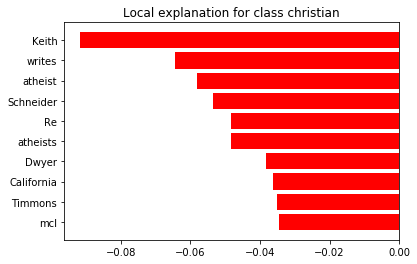

In [26]:
# 視覺化權重

%matplotlib inline
fig = exp.as_pyplot_figure()

In [27]:
# 視覺化搭配類別

exp.show_in_notebook(text=False)

In [33]:
# 儲存類似上面的圖，但更詳細，包含原始文章

import os

if 'tmp' not in os.listdir():
    os.mkdir('tmp')
exp.save_to_file('tmp/oi.html')

In [34]:
# 展示

exp.show_in_notebook(text=True)

Lime 的應用到此結束，只要模型有預測機率的function，任何ML分類器基本上都可以使用。